# **Concepts Covered:**

- <a href = #link4>Hypothesis Test for Population Mean $\mu$</a>
- <a href = #link5>One-tailed and Two-tailed Tests</a>
- <a href = #link6>One Sample T-test for Population Mean $\mu$</a>
- <a href = #link7>Two Independent Sample Z-test for Equality of Means</a>
- <a href = #link8>Two Independent Sample T-test for Equality of Means - Equal Std Dev</a>
- <a href = #link9>Two Independent Sample T-test for Equality of Means - Unequal Std Dev</a>
- <a href = #link16>Paired Sample T-test for Equality of Means</a>
- <a href = #link10>One Proportion Z-test</a>
- <a href = #link11>Two Proportion Z-test</a>
- <a href = #link12>Chi-Square Test for Variance</a>
- <a href = #link13>F-test for Equality of Variances</a>
- <a href = #link14>Chi-Square Test for Independence</a>
- <a href = #link15>One-way ANOVA Test</a>











## The parameter 'alternative' has been introduced in the SciPy version 1.6.0. Hence, it is necessary to install the required Scipy version in the system by executing the below command.

In [38]:
# install the scipy version 1.6.1. and restart the kernel after the successful installation
!pip install scipy==1.6.1

In [39]:
# import the scipy and check the version to be sure that the version is 1.6.1.
import scipy
scipy.__version__

'1.6.1'

## Import the required packages

In [40]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.


### Hypothesis go beyond Estimation

# <a name='link4'>**Hypothesis Test for Population Mean $\mu$**</a>



### One Sample Z-test (when population standard deviation is known)

It is rarely the case when you know the population standard deviation...but let's assume that is the case

It is known from experience that for a certain E-commerce company 
* the mean delivery time of the products is 5 days 
>$H_0: \mu = 5$
* with a standard deviation of 1.3 days.

The new customer service manager of the company is afraid that the company is slipping and collects a 
* random sample of 45 orders. 

The mean delivery time of these samples comes out to be 5.25 days. 

Is there enough statistical evidence for the manager's apprehension that the mean delivery time of products is greater than 5 days.

* Use level of significance $\alpha$ = 0.05

### Let's write the null and alternate hypotheses

Let $\mu$ be the mean delivery time of the products.

The manager will test the null hypothesis

>$H_0: \mu = 5$

against the alternate hypothesis

> $H_a: \mu > 5$

### Are the assumptions of Z-test satisfied?

*   Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply z test on if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that the manager collected a simple random sample
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

### The next step is to find the Z test statistic




In [41]:
# set the values of population mean and population standard deviation to 5 and 1.3 respectively
mu, sigma = 5, 1.3

# Population sample 
n = 45

# set the value sample mean to 5.25
x_bar = 5.25

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(n))
test_stat

1.2900392177883402

#### The Z test statistic follows a standard normal distribution.

Let's plot the distribution of the Z test statistic and see where the computed test statistic lies in the plot.

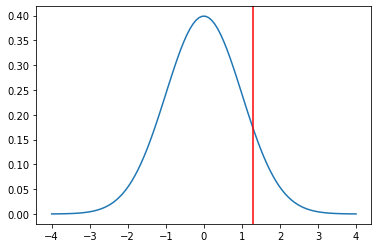

In [42]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

In [43]:
norm.cdf(test_stat)

0.901481479074213

What is the probability of getting the calculated value of test statistic or bigger in the above distribution?

In [44]:
# calculate the probability using the cdf() function
1 - norm.cdf(test_stat)

0.09851852092578695

**Though the probability is very small, is it significant enough to reject the null hypothesis in favor of alternate hypothesis?**

### Introduction of Rejection Acceptance Region/ p-value

Though the probability is small, we can not conclude whether the evidence is significant enough to reject the null hypothesis in favor of alternate hypothesis or not. To determine it, we use either one of the following approaches:

1- Rejection region approach

2- p-value approach

#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying in the right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

In [45]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(1-.05)
critical_val

1.6448536269514722

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

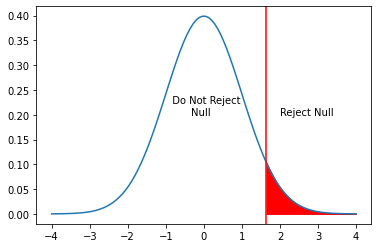

In [46]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.annotate('Reject Null', (2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

### Insight

As our test statistic (~ 1.29) does not lie in the rejection region, we can not reject the null hypothesis. Thus, we do not have statistical evidence to say that the mean delivery time of a product is greater than 5 days.

#### p-value Approach

Though the rejection region approach gives us the desired conclusion, it does not say anything about the strength of the evidence. Hence, statisticians prefer p-value approach which measures the strength of the evidence against the null hypothesis.

For this approach, we need to follow the below steps.

1. We choose a level of significance ($\alpha$)

2. Then, we calculate the p-value.

3. We reject the null hypothesis if p-value $\leq \alpha$. Else, we fail to reject the null hypothesis.

The p-value is the probability of finding the observed test statistic or more extreme results, under the null hypothesis. 

In the given example, p-value is the area right to the test statistic under the standard normal curve.


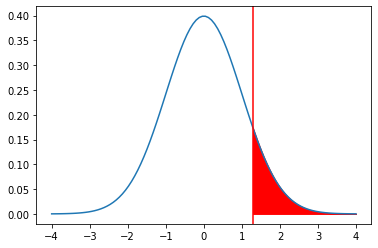

In [47]:
# plotting the test statistic distribution along with computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(test_stat, 4, 50) # create an array of 50 numbers starting from the test statistic and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the test statistic value with red color
plt.show() # display the plot

In [48]:
# calculate the p-value using the cdf() function
1 - norm.cdf(test_stat)

0.09851852092578695

### Insight

### As the p-value ~0.098 is greater than level of significance, we can not reject the null hypothesis. Thus, we do not have statistical evidence to say that the mean delivery time of a product is greater than 5 days.

### Key Takeaway

* We get the same result by using both the Rejection Region and p-value approach that the manager does not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

# <a name='link5'>**One-tailed and Two-tailed Tests**</a>

### Let's see an example

Suppose a soft-drink manufacturer's most selling product is 600 ml coke with a standard deviation of 50 ml.

A customer would like to test whether there is at least 600 ml coke in the bottle. He doubts that the amount of coke in the bottle is less than 600 ml.

The null hypothesis formed by the customer is

>$H_0: \mu = 600$

against the alternative hypothesis

> $H_a: \mu < 600$

However, the quality control team wants exactly 600 ml coke in the bottle. The team wants to ensure that the amount of coke in the bottle is not different from 600 ml.

The null hypothesis formed by the quality control team is

>$H_0: \mu = 600$

against the alternative hypothesis

> $H_a: \mu \neq 600$

Thus, the choice of one-sided vs two-sided alternative hypothesis depends on the nature of the problem.

### Two-tailed Test Example

Suppose you work on the quality control team of the company. It is known from experience that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml.

You have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

You intend to test whether the amount of coke in the bottle is different from 600 ml using 0.05 level of significance. Do you have enough Statistical evidence for it?

### Are the assumptions of Z-test satisfied?

*   Samples are drawn from a normal distribution - Since the sample size is 36(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply Z test on if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that you have collected a simple random sample.
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

### The next step is to find the test statistic

In [49]:
# set the values of population mean and standard deviation to 600 and 50 respectively
mu, sigma = 600, 50

# set the value sample mean to 580
x_bar = 580

# Sample Population 
n=36

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(n))
test_stat

-2.4

### Let's use the rejection region approach for two-tailed test

In the given example, the Z test statistic follows a standard normal distribution. The Z values lying in the left and right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the values of Z (called critical values) that give an area of $\alpha/2$ to both the left and right end.

1.959963984540054 -1.9599639845400545


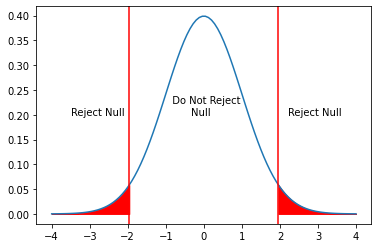

In [50]:
# import the required function
from scipy.stats import norm

# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

print(critical_val1,critical_val2)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val1, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val1, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.axvline(x = critical_val2, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(-4, critical_val2, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (2.2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is different from 600 ml.

### One-tailed Test Example

It is known that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml. Suppose you are a customer who wants to test whether the amount of coke in the bottle is less than 600 ml.

You have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

Do you have enough Statistical evidence for it?

### Are the assumptions of Z-test satisfied?
*   Samples are drawn from a normal distribution - Since the sample size is 36(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply Z test on if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that you have collected a simple random sample.
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

### The next step is to find the test statistic

In [51]:
# set the values of population mean and standard deviation to 600 and 50 respectively
mu, sigma = 600, 50

# set the value sample mean to 580
x_bar = 580

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

### Let's use the rejection region approach for one-tailed test

In the given example, the Z test statistic follows a standard normal distribution. The Z values lying in the left end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that give an area of $\alpha$ to both the left end.

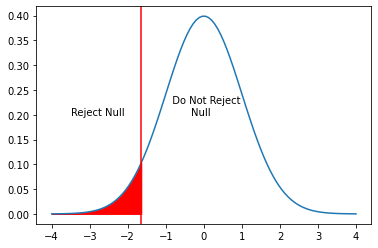

In [52]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(-4, critical_val, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is less than from 600 ml.

### Key Takeaways

* In one-sided test, we consider the difference only in one direction. However, in two-sided tests we are interested to know the direction of the difference. 
* Depending on the nature of the problem choose one!

# <a name='link6'>**One Sample T-test for Population Mean $\mu$**</a>

### Let's revisit the example
A certain food aggregator ZYX is facing stiff competition from its main rival SWG during Corona period. To retain business, ZYX is advertising that, within a radius of 5 km from the restaurant where the order is placed, it can still deliver in 40 minutes or less on the average (and changed condition has not made any impact on them). 

The delivery times in minutes of 25 randomly selected deliveries are given in a CSV file.

Assuming the delivery distribution is approximately normal, is there enough evidence that ZYX’s claim is false?


### Let's write the null and alternative hypothesis
Let $\mu$ be the mean delivery time of the ZYX food aggregator.

We will test the null hypothesis

>$H_0:\mu = 40$

against the alternate hypothesis

>$H_a:\mu > 40$



### Let's have a look on the sample data

In [53]:
fastfood = pd.read_csv('../data/FastFood1.csv')
fastfood.head()

,Delivery,Time
0,1,39.4
1,2,39.5
2,3,39.7
3,4,40.7
4,5,40.4


### Let's test whether the T-test assumptions are satisfied or not

* ### Continuous data - Yes, the delivery time is measured on a continuous scale.

*  ### Normally distributed population and Sample size < 30 - Yes, it is assumed that the population is normal and the sample size is 25 which is less than 30.
*   ### Observations are from a simple random sample - Yes, we are informed that the collected sample a simple random sample.
*   ### Population standard deviation is known - No

Voila! We can use T-test for this problem.

### Let's find the p-value

In [54]:
#import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(fastfood['Time'], popmean = 40, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  1.4822680927543513e-05


In [55]:
if p_value <  0.05:
    print(True)

True


### Insight
As the p-value is much less than the level of significance, we can reject the null hypothesis. Hence, we do not have enough significance to conclude that the mean delivery time within 5 km radius is indeed 40 min or less, as claimed by ZYX in their advertisement.



# <a name='link7'>**Two Independent Sample Z-test for Equality of Means**</a>

### Let's revisit the example

To compare customer satisfaction levels of two competing media channels, 150 customers of Channel 1 and 300 customers of Channel 2 were randomly selected and were asked to rate their channels on a scale of 1-5, with 1 being least satisfied and 5 most satisfied (The survey results are summarized in a CSV file). Suppose we know that, $\sigma_1$ = 0.48 and $\sigma_2$ = 0.49.

Test at 0.05 level of significance whether the data provide sufficient evidence to conclude that channel 1 has a higher mean satisfaction rating than channel 2.


### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean customer rating of channel 1 and channel 2 respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's have a look on the sample data

In [56]:
rating = pd.read_csv('../data/rating.csv')
rating.head()

,channel1_rating,channel2_rating
0,3.5,3.3
1,3.7,3.3
2,3.0,2.9
3,3.8,3.7
4,3.3,4.0


In [57]:
# find the sample means and sample standard deviations for the two samples
print('The mean rating for channel 1 is ' + str(round(rating['channel1_rating'].mean(),1)))
print('The mean rating for channel 2 is ' + str(round(rating['channel2_rating'].mean(), 1)))

The mean rating for channel 1 is 3.5
The mean rating for channel 2 is 3.2




### Let's test whether the Z-test assumptions are satisfied or not

* Continuous data - The ratings are measured on a continuous scale.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two different channels, the two samples are from two independent populations.
* Known population standard deviation $\sigma_1$ and $\sigma_2$ - Yes, we know the population standard deviations of both the populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use two sample Z-test for this problem.

### Let's find the p-value

In [58]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    return pval # return the p-value

In [59]:
# find the p-value using the ztest_2samp() function
p_value = ztest_2samp(rating['channel1_rating'].dropna(), rating['channel2_rating'], 0.48, 0.49, 150 ,300)
print('The P-value is', p_value)

The P-value is 5.87973714161194e-09


### Insight

As the p-value is much less than the level of significance 0.05, we reject the null hypothesis. Thus, we have enough statistical evidence to say that channel 1 has a higher mean satisfaction rating than channel 2.

# <a name='link8'>**Two Independent Sample T-test for Equality of Means - Equal Std Dev**</a>


### Let's revisit the example


In the lockdown period, because of working from home and increased screen time, many opted for listening to FM Radio for entertainment rather than watching Cable TV. An advertisement agency randomly collected daily usage time data (in minutes) from both type of users and stored it in a CSV file.

Assuming daily Radio and TV usage time are normally distributed, do we have enough evidence to conclude that there is any difference between daily TV and Radio usage time at 0.05 significance level?


### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the daily mean Radio usage time and TV usage time respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$



### Let's have a look on the sample data

In [60]:
tvradio = pd.read_csv('../data/TVRadio.csv')
tvradio.head()

,Cable_TV,FM_Radio
0,22,25
1,8,10
2,25,29
3,22,19
4,12,13


In [61]:
# find the sample means and sample standard deviations for the two samples
print('The mean usage time of cable TV is ' + str(tvradio['Cable_TV'].mean()))
print('The mean usage time of FM radio is ' + str(tvradio['FM_Radio'].mean()))
print('The standard deviation of usage time of cable TV is ' + str(round(tvradio['Cable_TV'].std(),2)))
print('The standard deviation of usage time of FM radio is ' + str(round(tvradio['FM_Radio'].std(),2)))

The mean usage time of cable TV is 18.8
The mean usage time of FM radio is 20.0
The standard deviation of usage time of cable TV is 5.41
The standard deviation of usage time of FM radio is 5.42


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use two sample T-test for this problem.



### Let's find the p-value

In [62]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(tvradio['Cable_TV'], tvradio['FM_Radio'], equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.5491435225558506


### Insight
As the p-value(~0.55) is much greater than the level of significance, we can not reject the null hypothesis. Hence, we do not have enough significance to conclude that there is any difference between daily TV and Radio usage at 0.05 significance level.

# <a name='link9'>**Two Independent Sample T-test for Equality of Means - Unequal Std Dev**</a>



### Let's revisit the example

SAT verbal scores of two groups of students are given in a CSV file. The first group, College, contains scores of students whose parents have at least a bachelor's degree and the second group, High School, contains scores of students whose parents do not have any college degree.

The Education Department is interested to know whether the sample data support the theory that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

Assuming SAT verbal scores for two populations are normally distributed, do we have enough statistical evidence for this at 5% significance level?

### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean SAT verbal scores of **College** and **High School** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's have a look on the sample data

In [63]:
# import the data
satscore = pd.read_csv('../data/SATVerbal1.csv')
satscore.head()

,College,High School
0,485,489.0
1,534,507.0
2,650,447.0
3,554,515.0
4,550,470.0


In [64]:
# find the sample means and sample standard deviations for the two samples
print('The mean SAT verbal score for College group is ' + str(satscore['College'].mean()))
print('The mean SAT verbal score for High School group is ' + str(satscore['High School'].mean()))
print('The standard deviation of SAT verbal score for College group is ' + str(round(satscore['College'].std(), 2)))
print('The standard deviation of SAT verbal score for High School group is ' + str(round(satscore['High School'].std(), 2)))

The mean SAT verbal score for College group is 525.0
The mean SAT verbal score for High School group is 480.0
The standard deviation of SAT verbal score for College group is 59.42
The standard deviation of SAT verbal score for High School group is 31.1


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the SAT score is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Voila! We can use two sample T-test for this problem.



### Let's find the p-value

In [65]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value


test_stat, p_value = ttest_ind(satscore['College'], satscore['High School'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0080349560264902


In [66]:
satscore['High School'].dropna()

0     489.0
1     507.0
2     447.0
3     515.0
4     470.0
5     424.0
6     461.0
7     511.0
8     500.0
9     441.0
10    512.0
11    483.0
Name: High School, dtype: float64

### Insight
As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

# <a name='link16'>**Paired Sample T-test for Equality of Means**</a>

### Let's revisit the example
Typical prices of single-family homes in Florida are given for a sample of 15 metropolitan areas (in 1000 USD) for 2002 and 2003 in a CSV file.
 
Assuming the house prices are normally distributed, do we have enough statistical evidence to say that there is an increase in the house price in one year at 0.05 significance level?

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2$ be the mean price of single-family homes in metropolitan areas of Florida for 2002 and 2003 respectively.

We want to test whether there is an increase in the house price from 2002 to 2003.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

### Let's have a look on the sample data

In [67]:
# import the data
houseprice = pd.read_csv('../data/Florida.csv')
houseprice.head()

,Metropolitan Area,Jan_2003,Jan_2002
0,Daytona Beach,117,96
1,Fort Lauderdale,207,169
2,Fort Myers,143,129
3,Fort Walton Beach,139,134
4,Gainesville,131,119


In [68]:
# find the mean difference between the house prices from 2003 to 2002
# the aim behind finding this difference is to check there is really an increase in the house price from 2002 to 2003.
diff = np.mean(houseprice['Jan_2003'] - houseprice['Jan_2002'])
print('The mean of the differences between the house prices from 2003 to 2002', diff)

The mean of the differences between the house prices from 2003 to 2002 15.0


### Let's test whether the paired T-test assumptions are satisfied or not

* Continuous data - Yes, the house price is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent observations - As we are taking the sampled unit randomly, the observed units are independent.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use paired sample T-test for this problem.



### Let's find the p-value

In [69]:
#import the required functions
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value = ttest_rel(houseprice['Jan_2002'], houseprice['Jan_2003'], alternative = 'less')
print('The p-value is ', p_value)

The p-value is  8.282698151615477e-05


### Insight
As the p-value is much less than the level of significance, the null hypothesis can be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that there is an increase in the price from 2002 to 2003.


# <a name='link10'>**One Proportion Z-test**</a>

### Let's revisit the example

A researcher claims that Democratic party will win in the next United States Presidential election. 

To test her belief the researcher randomly surveyed 90 people and 24 out of them said that they voted for Democratic party. 

Is there enough evidence at 𝛂 = 0.05 to support this claim?


### Let's write the null and alternative hypothesis
Let $p$ be the proportion of people who voted for Democratic party.

The researcher will test the null hypothesis

>$H_0:p \leq 0.5$

against the alternate hypothesis

>$H_a:p > 0.5$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, people either vote for Democratic or Republic party
*   Random sampling from the population - Yes, the researcher conducted a random survey
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively. 
>$np = 90\cdot \frac{24}{90} =24 \geq 10\\
n(1-p) = 90 \cdot \frac{90-24}{90} =66 \geq 10$


### Let's find the p-value

In [70]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(24, 90, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.9999997216721324


### Insight

As the p-value is much greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the researcher do not have enough statistical significance to claim that Democratic party will win in the next United States Presidential election at 5% significance level.

# <a name='link11'>**Two Proportion Z-test**</a>

### Let's revisit the example

A car manufacturer aims to improve its products' quality by reducing the defects. So, the manufacturer randomly checks the efficiency of two assembly lines in the shop floor. In line 1, there are 20 defects out of 200 samples and In line 2, there are 25 defects out of 400 samples. 

At 5% level of significance, do we have enough statistical evidence to conclude that the two assembly procedures are different?


### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of defects in assembly line 1 and line 2 respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 200\cdot \frac{20}{200} =20 \geq 10\\
n(1-p_1) = 200 \cdot \frac{200-20}{200} =180 \geq 10 \\
np_2 = 400\cdot \frac{25}{400} =25 \geq 10\\
n(1-p_2) = 400 \cdot \frac{400-25}{375} =375 \geq 10 $


### Let's find the p-value

In [71]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([20, 25])

# set the sample sizes
nobs = np.array([200, 400])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.10017829422626796


### Insight

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the manufacturer do not have enough statistical significance to conclude that the two assembly procedures are different.

# <a name='link12'>**Chi-Square Test for Variance**</a>

### Let's revisit an example
It is conjectured that the standard deviation for the annual return of mid cap mutual funds is 22.4%, when all such funds are considered and over a long period of time. The sample standard deviation of a certain mid cap mutual fund based on a random sample of size 32 is observed to be 26.4%. 

Do we have enough evidence to claim that the standard deviation of the chosen mutual fund is greater than the conjectured standard deviation for mid cap mutual funds at 0.05 level of significance?



### Let's write the null and alternative hypothesis
Let $\sigma$ be the average standard deviation of the mutual funds.

We will test the null hypothesis

>$H_0:\sigma^2 = 22.4^2$

against the alternate hypothesis

>$H_a:\sigma^2 > 22.4^2$

### Let's test whether the assumptions are satisfied or not

* Continuous data - Yes
* Normally distributed population - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.   


### Let's find the p-value

In [72]:
#import the required function
from scipy.stats import chi2

# user-defined function to get the test stat and p-value
# To know more about the derivation of test statistic formula, please refer to the monographs and additional materials
def chi_var(pop_var, sample_var, n):
  # calculate the test statistic
  test_stat = (n - 1) * sample_var / pop_var
  # calculate the p-value
  p_value = 1 - chi2.cdf(test_stat, n-1)
  return (test_stat, p_value)

# set the value of sample size
n = 32
# set the values of population and sample variance
sigma_2, s_2 = 22.4**2, 26.4**2

test_stat, p_value = chi_var(sigma_2, s_2, n)

print('The p-value is ', p_value)

The p-value is  0.0733923626973344


### Insight
As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the standard deviation of the chosen mutual fund is greater than the average standard deviation for mid cap mutual funds at 0.05 level of significance.

# <a name='link13'>**F-test for Equality of Variances**</a>



### Let's revisit the example

The variance of a process is an important quality of the process. A large variance implies that the process needs better control and there is opportunity to improve. 


The data (Bags.csv) includes weights for two different sets of bags manufactured from two different machines. It is assumed that the weights for two sets of bags follow normal distribution.

Do we have enough statistical evidence at 5% significance level  to conclude that there is a significant difference between the variances of the bag weights for the two machines.



### Let's write the null and alternative hypothesis
Let $\sigma_1^2, \sigma_2^2$ be the variances of weights of the bags produced by two different machines.

We will test the null hypothesis

>$H_0:\sigma_1^2 = \sigma_2^2$

against the alternate hypothesis

>$H_a:\sigma_1^2 \neq \sigma_2^2$

### Let's test whether the assumptions are satisfied or not

* Continuous data - Yes, the weight is measured on a continuous scale.
* Normally distributed populations - Yes, it is assumed that the populations are normally distributed.
* Independent populations - As the two sets of bags are manufactured from two different machines, the populations are independent.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Let's have a look on the sample data

In [93]:
bagweight = pd.read_csv('..data/Bags.csv')
bagweight.head()

FileNotFoundError: [Errno 2] No such file or directory: '..data/Bags.csv'

### Let's find the p-value

In [90]:
# import the required function
from scipy.stats import f

# user-defined function to perform F-test
# To know more about the derivation of test statistic formula, please refer to the monographs and additional materials
def f_test(x, y):
  x = np.array(x)
  y = np.array(y) 
  test_stat = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
  dfn = x.size-1 #define degrees of freedom numerator 
  dfd = y.size-1 #define degrees of freedom denominator 
  p = (1 - f.cdf(test_stat, dfn, dfd)) # find p-value of F test statistic 
  p1 = p*2 # Converting one-tail to two-tail test 
  return(print("The p_value is {}" .format(round(p,8)))) 

#perform F-test 
f_test(bagweight.dropna()['Machine 1'], bagweight.dropna()['Machine 2'])

NameError: name 'bagweight' is not defined

### Insight
As the p-value is much smaller than the level of significance, the null hypothesis can be rejected. Hence, we have enough statistical evidence to conclude that there is a difference between the bag weights for the two machines at 0.05 significance level.

# <a name='link14'>**Chi-Square Test for Independence**</a>

### Let's revisit the example

The beverage preference data for different age groups has given in the Beverage.csv file.

Do we have enough statistical evidence to conclude that beverage preference depend on age.



### Let's have a look on the sample data

In [97]:
beverage = pd.read_csv('../data/Beverage.csv')
beverage.head()

,Age,Tea/Coffee,Soft Drink,Others
0,21 - 34,25,90,20
1,35 - 55,40,35,25
2,> 55,24,15,30


In [98]:
beverage.drop('Age', axis = 1)

,Tea/Coffee,Soft Drink,Others
0,25,90,20
1,40,35,25
2,24,15,30


### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Beverage preference is independent of age.

against the alternate hypothesis

>$H_a:$ Beverage preference depends on age.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Let's find the p-value

In [96]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(beverage.drop('Age', axis = 1))

print('The p-value is', p_value)
print('The chi is', chi)
print('The dof is', dof)
print('The expected is', expected)

The p-value is 5.410957050304089e-10
The chi is 49.15840930376024
The dof is 4
The expected is [[39.52302632 62.17105263 33.30592105]
 [29.27631579 46.05263158 24.67105263]
 [20.20065789 31.77631579 17.02302632]]


### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that beverage preference is not independent of age at 5% significance level.

# <a name='link15'>**One-way ANOVA Test**</a>

### Let's revisit the example

Traffic management inspector in a certain city wants to understand whether carbon emissions from different cars are different. The inspector has reasons to believe that Fuel type may be the factors responsible for differences in carbon emission.

For this purpose, the inspector has taken random samples from all registered cars on the road in that city and would like to test if the amount of carbon emission release depends on fuel type at 5% significance level.

### Let's have a look on the sample data

In [79]:
aovdata = pd.read_csv('../data/AOVData.csv')
aovdata.head()

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


Here, co_emissions is the response and fuel_type is the factor.

In [80]:
# get the levels of factor fuel_type
aovdata['fuel_type'].value_counts()

Petrol    179
LPG       170
E85       161
Name: fuel_type, dtype: int64

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of carbon dioxide emissions for fuel type E85, LPG and Petrol respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one carbon emission level is different from the rest.


fuel_type
E85       338.124534
LPG       363.744412
Petrol    371.722961
Name: co_emissions, dtype: float64


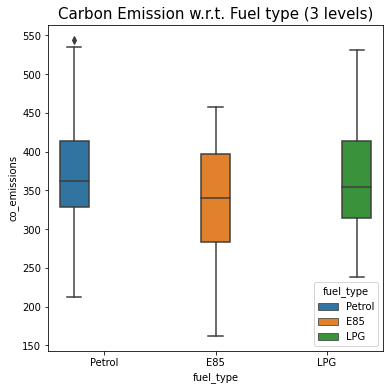

In [81]:
# mean of carbon emission at different levels of the fuel_type factor
print(aovdata.groupby("fuel_type")["co_emissions"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "fuel_type", y = 'co_emissions' , data = aovdata, hue = 'fuel_type')
a.set_title("Carbon Emission w.r.t. Fuel type (3 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Carbon emission follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Carbon emission does not follow a normal distribution

In [82]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(aovdata['co_emissions']) 
print('The p-value is', p_value)

The p-value is 0.49709552526474


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [83]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( aovdata['co_emissions'][aovdata['fuel_type']=="Petrol"], 
                                   aovdata['co_emissions'][aovdata['fuel_type']=="E85"], 
                                   aovdata['co_emissions'][aovdata['fuel_type']=="LPG"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.19437768490117


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Let's find the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(aovdata.loc[aovdata['fuel_type'] == 'Petrol', 'co_emissions'],
                              aovdata.loc[aovdata['fuel_type'] == 'E85', 'co_emissions'],
                              aovdata.loc[aovdata['fuel_type'] == 'LPG', 'co_emissions'])
print('The p-value is ' + str(p_value))

### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  at least one carbon emission level is different from the rest at 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.

### Multiple Comparison test (Tukey HSD)


In order to identify for which fuel type mean carbon emission is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = aovdata['co_emissions'], groups = aovdata['fuel_type'], alpha = 0.05)
print(m_comp)

### Insight

As the p-values (refer to the p-adj column) for comparing the mean carbon emissions for the pair E85-LPG and E85-Petrol is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean carbon emission for Petrol and LPG is similar but emission for fuel type E85 is significantly different from LPG and Petrol.

# ---------------------------------------------**The End**-------------------------------------------------